<a href="https://colab.research.google.com/github/harismehboob142/Stock_Prediction/blob/master/stocks_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving AAPL.csv to AAPL (1).csv
Epoch 1/50
27/27 [==============================] - 6s 9ms/step - loss: 0.1067
Epoch 2/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 3/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 4/50
27/27 [==============================] - 0s 10ms/step - loss: 7.4627e-04
Epoch 5/50
27/27 [==============================] - 0s 9ms/step - loss: 4.7206e-04
Epoch 6/50
27/27 [==============================] - 0s 9ms/step - loss: 4.4217e-04
Epoch 7/50
27/27 [==============================] - 0s 9ms/step - loss: 4.3922e-04
Epoch 8/50
27/27 [==============================] - 0s 11ms/step - loss: 4.3505e-04
Epoch 9/50
27/27 [==============================] - 0s 9ms/step - loss: 4.2837e-04
Epoch 10/50
27/27 [==============================] - 0s 9ms/step - loss: 4.3673e-04
Epoch 11/50
27/27 [==============================] - 0s 9ms/step - loss: 4.2004e-04
Epoch 12/50
27/27 [==============================] - 0s 10ms/st

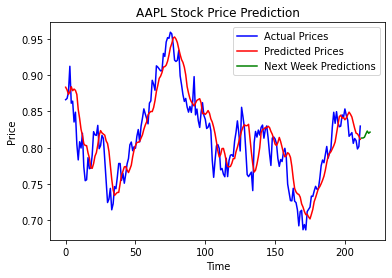

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from google.colab import files
import matplotlib.pyplot as plt

file = files.upload()
# Load the data from the CSV file
df = pd.read_csv('AAPL.csv')

# Get the 'Close' prices from the DataFrame
data = df['Close'].values

# Normalize the data
data = data / np.max(data)

# Define the length of the input sequence
seq_length = 5

# Create the input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = np.array(X[:split]), np.array(y[:split])
X_test, y_test = np.array(X[split:]), np.array(y[split:])

# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
predictions = predictions * np.max(data)
y_test = y_test * np.max(data)

# Print the predictions and actual values
for i in range(len(predictions)):
    print('Predicted: ',predictions[i], '\tActual: ', y_test[i], '\tDifference: ', y_test[i]-predictions[i], "\tAccuracy ", 100 - ((np.abs(predictions[i] - y_test[i]))/(y_test[i] * 100)),'%')

# Predict the next week's prices
last_prices = data[-seq_length:]
predictions_next_week = []
for i in range(7):
    pred = model.predict(last_prices.reshape(1, seq_length, 1))[0][0]
    predictions_next_week.append(pred)
    last_prices = np.append(last_prices[1:], pred)

# Denormalize the data
predictions_next_week = np.array(predictions_next_week) * np.max(data)

# Print the predicted prices for the next week
print('Predictions for the next week: ', predictions_next_week)
for pred in predictions_next_week:
    print(pred)

# Plot the predicted and actual prices
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.plot(np.arange(len(y_test), len(y_test)+7), predictions_next_week, color='green', label='Next Week Predictions')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model loaded from file.
7/7 [==============================] - 1s 4ms/step
Predicted:  [0.878495] 	Actual:  0.8661611907631775 	Difference:  [-0.01233381] 	Accuracy  [99.999855] %
Predicted:  [0.87482446] 	Actual:  0.8678644653553229 	Difference:  [-0.00695997] 	Accuracy  [99.999916] %
Predicted:  [0.86879826] 	Actual:  0.8762155946435799 	Difference:  [0.00741732] 	Accuracy  [99.999916] %
Predicted:  [0.8720738] 	Actual:  0.9121477312276175 	Difference:  [0.04007393] 	Accuracy  [99.99956] %
Predicted:  [0.87924224] 	Actual:  0.861326346391032 	Difference:  [-0.0179159] 	Accuracy  [99.999794] %
Predicted:  [0.873815] 	Actual:  0.864128362840733 	Difference:  [-0.00968665] 	Accuracy  [99.999886] %
Predicted:  [0.87599766] 	Actual:  0.8354486136873966 	Difference:  [-0.04054904] 	Accuracy  [99.99951] %
Predicted:  [0.87410295] 	Actual:  0.8489093964317729 	Difference:  [-0.02519357] 	Accuracy  [99.9997] %
Predicted:  [0.8684095] 	Actual:  0.8049008517361917 	Difference:  [-0.06350869] 	A

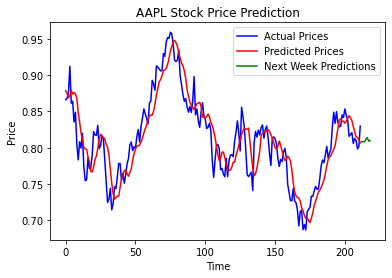

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('AAPL.csv')

# Get the 'Close' prices from the DataFrame
data = df['Close'].values

# Normalize the data
data = data / np.max(data)

# Define the length of the input sequence
seq_length = 5

# Create the input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = np.array(X[:split]), np.array(y[:split])
X_test, y_test = np.array(X[split:]), np.array(y[split:])

# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Check if the model has already been trained and saved
try:
    # Load the saved model
    model = load_model('stock_prediction_model.h5')
    print('Model loaded from file.')
except:
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Save the trained model to a file
    model.save('stock_prediction_model.h5')
    print('Model saved to file.')

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Denormalize the data
predictions = predictions * np.max(data)
y_test = y_test * np.max(data)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(predictions - y_test) / np.abs(y_test)) * 100
accuracy = 100 - mape

# Print the predictions, actual values, and accuracy

for i in range(len(predictions)):
    print('Predicted: ',predictions[i], '\tActual: ', y_test[i], '\tDifference: ', y_test[i]-predictions[i], "\tAccuracy ", 100 - ((np.abs(predictions[i] - y_test[i]))/(y_test[i] * 100)),'%')

# Predict the next week's prices
last_prices = data[-seq_length:]
predictions_next_week = []
for i in range(7):
    pred = model.predict(last_prices.reshape(1, seq_length, 1))[0][0]
    predictions_next_week.append(pred)
    last_prices = np.append(last_prices[1:], pred)

# Denormalize the data
predictions_next_week = np.array(predictions_next_week) * np.max(data)

# Print the predicted prices for the next week
print('Predictions for the next week: ', predictions_next_week)
for pred in predictions_next_week:
    print(pred)

# Plot the predicted and actual prices
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.plot(np.arange(len(y_test), len(y_test)+7), predictions_next_week, color='green', label='Next Week Predictions')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
